In [3]:
from pandas import DataFrame, melt
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd

In [39]:
origin = pd.read_excel('4사분위수_데이터.xlsx')
df = origin.drop('Unnamed: 0', axis=1)      # 콜론 뒤에 한 칸 띄어쓰기가 있는 경우 -> '~: 0'
df.head()

,price,carat,cut,color,clarity,x,y,z,depth,table
0,5324,1.21,Premium,H,SI2,6.75,6.78,4.24,62.7,59.0
1,5324,1.21,Very Good,H,SI2,6.70,6.75,4.21,62.6,61.0
2,5324,1.21,Very Good,I,SI1,6.76,6.92,4.25,62.1,56.0
3,5324,1.21,Ideal,J,VS1,6.81,6.86,4.26,62.3,55.0
4,5324,0.90,Very Good,F,VS1,6.18,6.23,3.80,61.2,56.0


In [5]:
origin.shape

(13457, 11)

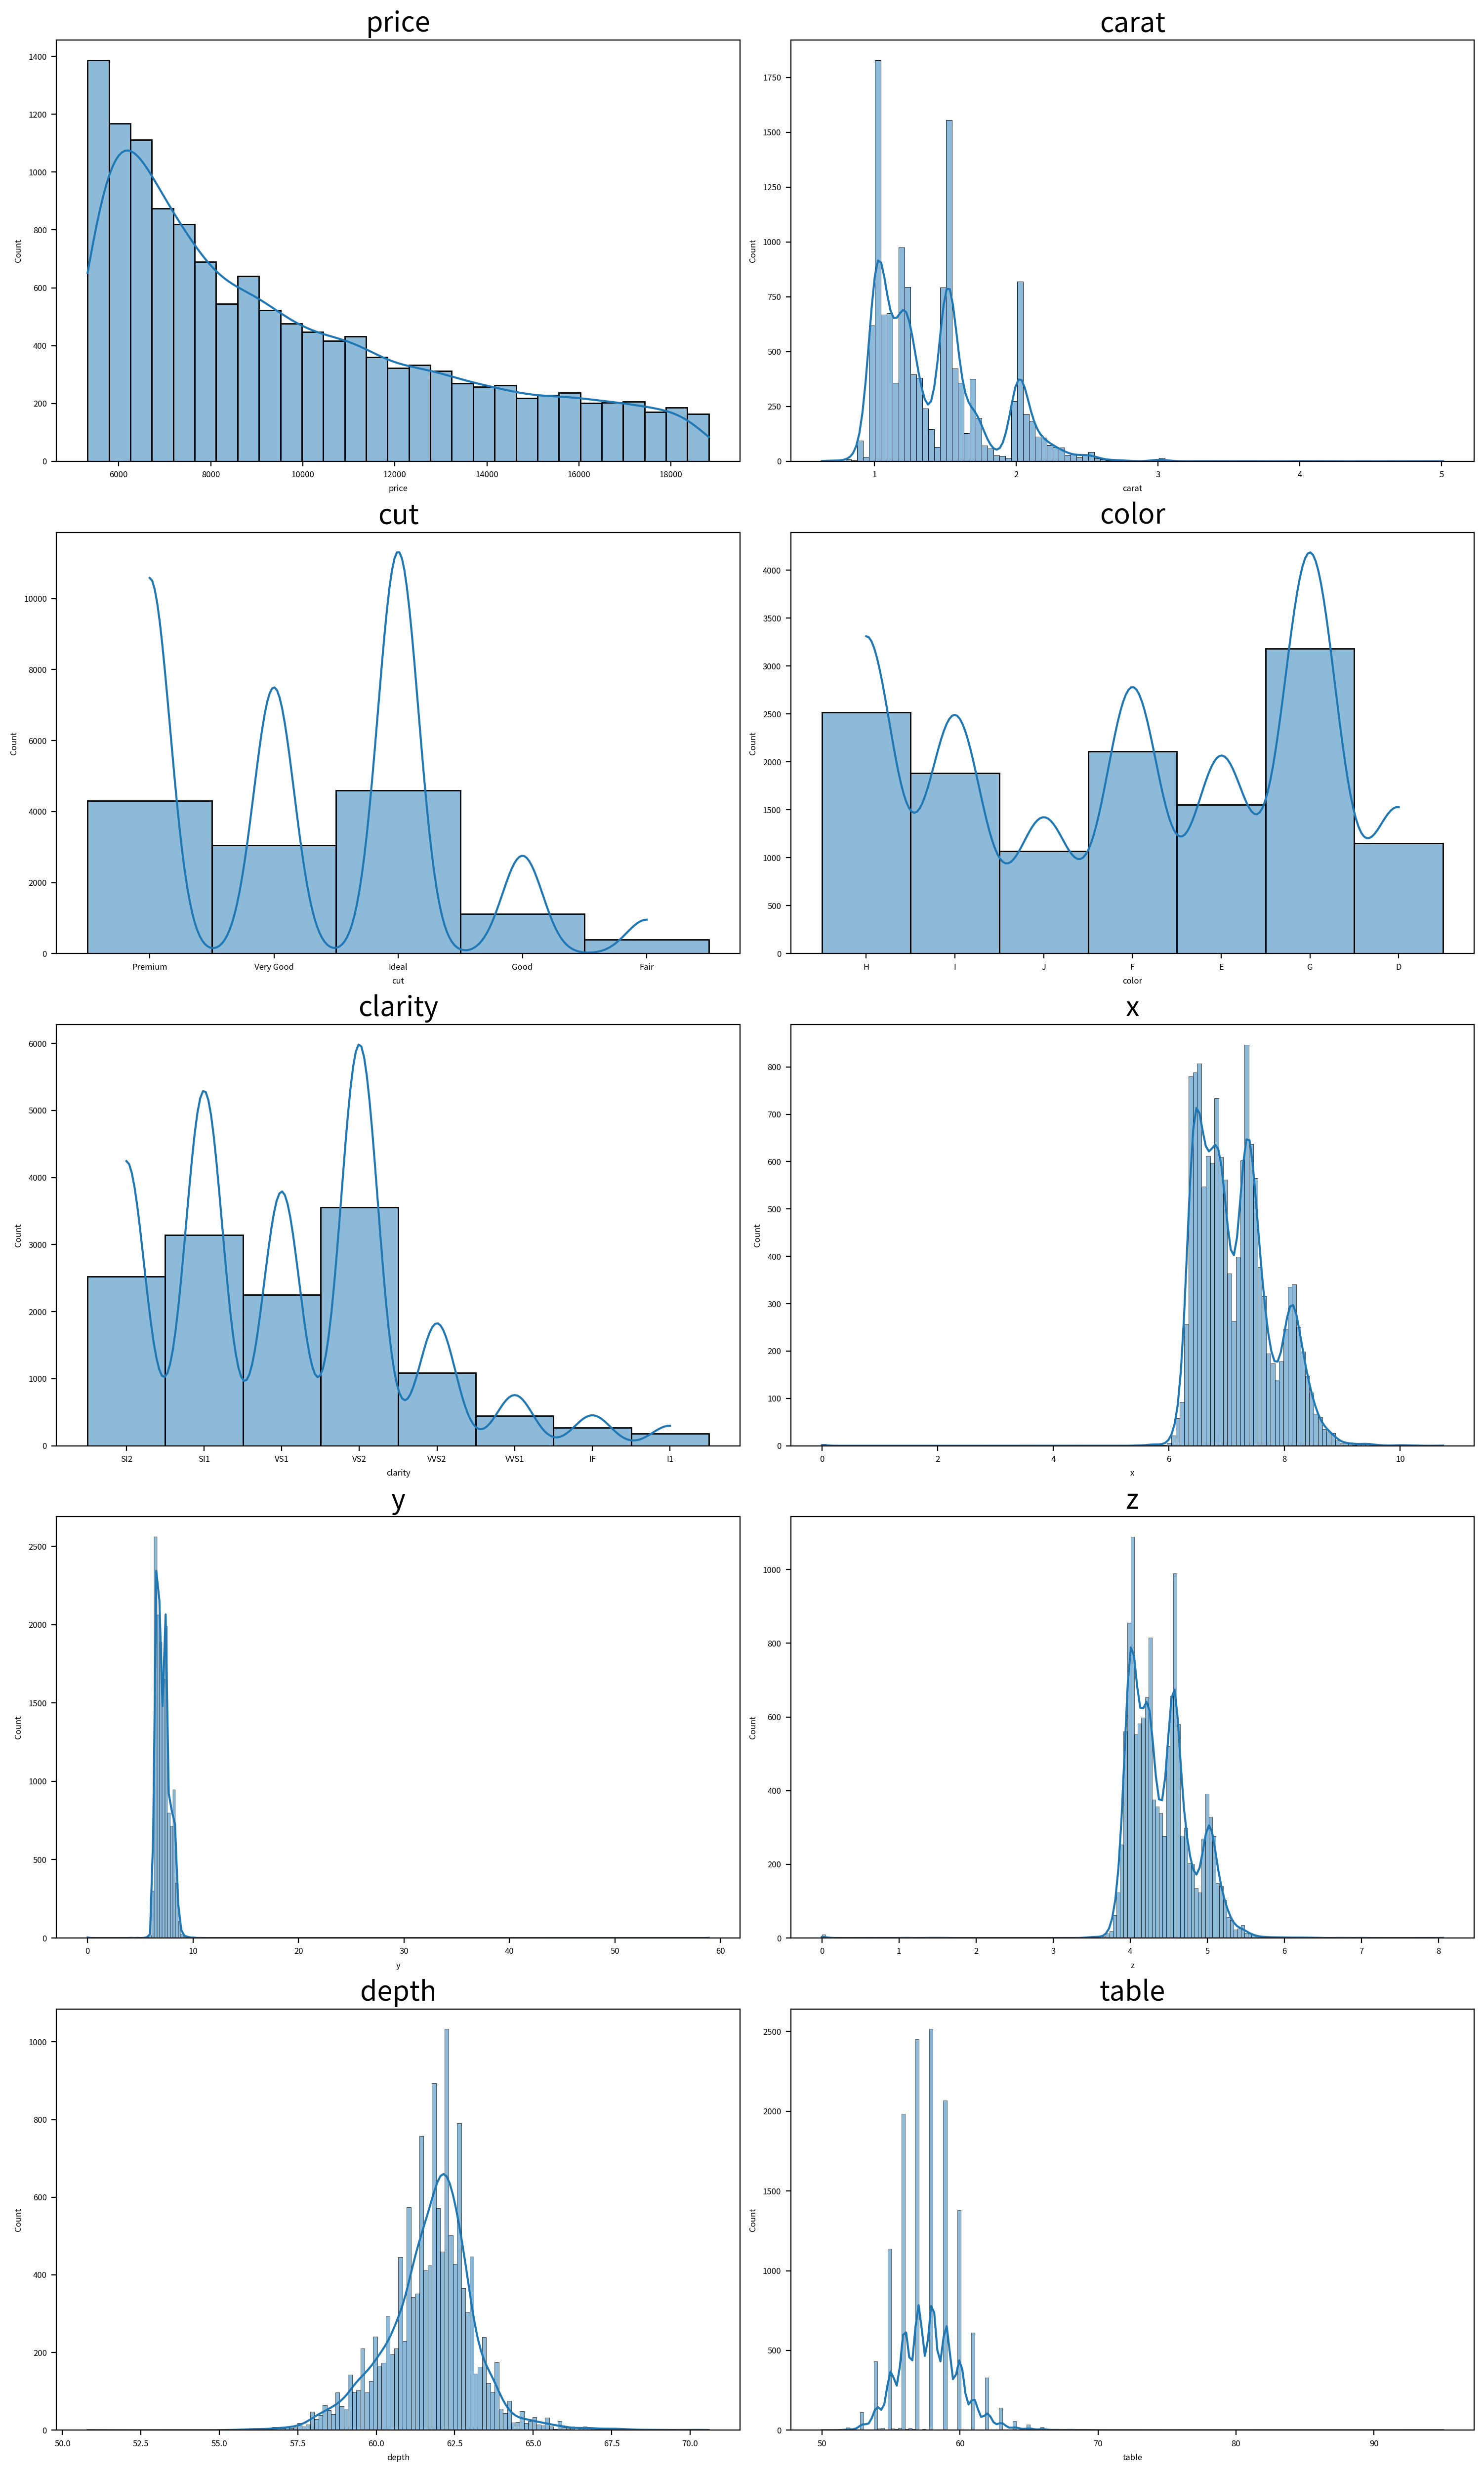

In [6]:
width_px = 3000
height_px = 5000
rows = 5
cols = 2
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, axes = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

axes_flat = axes.flatten()

for i, v in enumerate(df):
    sb.histplot(df[v], kde=True, ax=axes_flat[i])
    axes_flat[i].set_title(v, fontsize=20)

plt.tight_layout()
plt.show()
plt.close()

### 2. 연속형 필터링

In [40]:
# df2 = df.select_dtypes(include=['number'])
# df2.head()

### 3. 변수 간 상관관계

In [8]:
# width_px = 1000
# height_px = 1000
# rows = 1
# cols = 1
# figsize = (width_px / my_dpi, height_px / my_dpi)
# fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# # sb.heatmap(df2.corr(), annot=True, cmap="PuOr", linewidths=0.5, annot_kws={"size": 15})
# sb.heatmap(df2.corr(), annot=True, fmt="0.1f",center=0,vmin=-1, vmax=1, linewidth=0.5, cmap="PuOr",annot_kws={"size": 10})
# plt.title('변수 간 상관관계', fontsize=10)
# plt.show()

In [9]:
# 선형회귀를 위한 참조
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 결과 검정을 위한 참조
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, probplot, shapiro, anderson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# VIF값을 계산하기 위한 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
# cut_order = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
# color_order = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
# clarity_order = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7, 'I1': 8}

# df['map_cut'] = df['cut'].map(cut_order)
# df['map_color'] = df['color'].map(color_order)
# df['map_clarity'] = df['clarity'].map(clarity_order)

pre_df = df.copy()

pre_df=pd.get_dummies(df, drop_first=True)
pre_df=pre_df.astype(float)

pre_df.head()

,price,carat,x,y,z,depth,table,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,5324.0,1.21,6.75,6.78,4.24,62.7,59.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5324.0,1.21,6.70,6.75,4.21,62.6,61.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5324.0,1.21,6.76,6.92,4.25,62.1,56.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5324.0,1.21,6.81,6.86,4.26,62.3,55.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5324.0,0.90,6.18,6.23,3.80,61.2,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
pre_df2=pre_df.copy()
yname ='price'

x = pre_df2.drop(yname, axis=1)
y = pre_df2[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1 = fit.summary()
print(tbl1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3539.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        14:36:02   Log-Likelihood:            -1.1635e+05
No. Observations:               13457   AIC:                         2.327e+05
Df Residuals:                   13433   BIC:                         2.329e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.619e+04   1190.973    -13.596

In [12]:
def ols_report(tbl, data):
    """
    OLS summary(tbl)와 데이터프레임(data)을 받아 회귀계수 표(rdf),
    모델 적합도 요약(result_report), 모형 보고 문장(model_report),
    변수별 보고 리스트(variable_reports)를 반환한다.
    Parameters
    ---------
    tbl : statsmodels.iolib.summary.Summary
        sm.OLS(...).fit().summary() 결과로 생성된 summary 객체.
    data : pandas.DataFrame
        종속변수와 독립변수를 모두 포함한 데이터프레임.
    Returns
    ------
    tuple
        (회귀계수 DataFrame, 적합도 요약 문자열, 모형 보고 문자열, 변수별 보고 리스트)
    """
    # 독립변수 이름(상수항 제외)
    xnames = [n for n in fit.model.exog_names if n != "const"]

    # 독립변수 부분 데이터 (VIF 계산용)
    indi_df = data.filter(xnames)

    # 독립변수 결과를 누적
    variables = []
    for i, v in enumerate(tbl.tables[1].data):
    # 한 행의 변수명 추출 후 목록에 있는지 확인
        name = v[0].strip()
        if name not in xnames:
            continue

        # VIF 계산을 위해 열 인덱스 조회
        j = list(indi_df.columns).index(name)
        vif = variance_inflation_factor(indi_df, j)

        # 유의확률과 별표 표시 함수
        p = float(v[4].strip())
        stars = lambda p: (
            "//*" if p < 0.001 else
            "/*" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        # 한 변수에 대한 보고 정보 추가
        variables.append({
            "종속변수": yname,                         # 종속변수 이름
            "독립변수": name,                          # 독립변수 이름
            "B": v[1].strip(),                        # 비표준화 회귀계수(B)
            "표준오차": v[2].strip(),                 # 계수 표준오차
            "Beta": float(fit.params[name]) * (data[name].std(ddof=1) /
        data[yname].std(ddof=1)),  # 표준화 회귀계수(β)
            "t": "%s%s" % (v[3].strip(), stars(p)), # t-통계량(+별표)
            "p-value": p,                             # 계수 유의확률
            "공차": 1 / vif,                          # 공차(Tolerance = 1/VIF)
            "vif": vif,                               # 분산팽창계수
        })
        
    rdf = DataFrame(variables)

    # summary 표에서 적합도 정보를 key-value로 추출
    result_dict = {}
    for i in [0, 2]:
        for item in tbl.tables[i].data:
            n = len(item)
            for i in range(0, n, 2):
                key = item[i].strip()[:-1]
                value = item[i+1].strip()
                if not key or not value:
                    continue
                result_dict[key] = value

    # 적합도 보고 문자열 구성
    result_report = f"𝑅({result_dict['R-squared']}),𝑅^2({result_dict['Adj. R-squared']}), 𝐹({result_dict['F-statistic']}), 유의확률({result_dict['Prob (F-statistic)']}), Durbin-Watson({result_dict['Durbin-Watson']})"

    # 모형 보고 문장 구성
    tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %s, p %s 0.05)."
    model_report = tpl %(
        rdf['종속변수'][0],
        ",".join(list(rdf['독립변수'])),
        "유의하다" if float(result_dict['Prob (F-statistic)']) <= 0.05 else "유의하지 않다",
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        "<=" if float(result_dict['Prob (F-statistic)']) <= 0.05 else ">"
    )

    # 변수별 보고 문장 리스트 구성
    variable_reports = []
    s = "%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다."

    for i in rdf.index:
        row = rdf.iloc[i]
        variable_reports.append(s % (row['독립변수'],
                row['B'],
                "<=" if float(row['p-value']) < 0.05 else '>',
                row['종속변수'],
                '유의미한' if float(row['p-value']) < 0.05 else '유의하지 않은'))
        
    return rdf, result_report, model_report, variable_reports


In [13]:
rdf, r, m, v = ols_report(tbl1, pre_df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,carat,9660.3325,130.407,1.028590,74.078//*,0.000,0.005245,190.666516
1,price,x,689.1969,96.979,0.120432,7.107//*,0.000,0.000494,2023.008225
2,price,y,23.6589,27.721,0.004998,0.853,0.393,0.003601,277.681439
3,price,z,414.3237,100.079,0.046412,4.140//*,0.000,0.000815,1226.935018
4,price,depth,-33.0949,12.678,-0.013107,-2.611/*,0.009,0.001100,908.693726
5,price,table,-18.7982,7.181,-0.010996,-2.618/*,0.009,0.001268,788.792072
6,price,cut_Good,897.8393,84.313,0.067831,10.649//*,0.000,0.244556,4.089044
7,price,cut_Ideal,1532.1320,82.272,0.198773,18.623//*,0.000,0.068340,14.632678
8,price,cut_Premium,1069.3159,79.558,0.136375,13.441//*,0.000,0.073895,13.532738
9,price,cut_Very Good,1239.6774,79.973,0.141918,15.501//*,0.000,0.104125,9.603871


price에 대하여 carat,x,y,z,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(23,13433) = 3539., p <= 0.05).


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def drop_column_using_vif(X, thresh=10):
    """
    VIF가 임계값보다 높은 변수를 하나씩 순차적으로 제거하는 함수
    X: 독립변수들로만 구성된 데이터프레임
    """
    cols = X.columns.tolist()
    
    while True:
        X_temp = X[cols]
        
        vif = pd.DataFrame()
        vif["feature"] = X_temp.columns
        vif["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(len(X_temp.columns))]
        
        max_vif = vif["VIF"].max()
        
        if max_vif > thresh:
            max_vif_feature = vif.sort_values(by="VIF", ascending=False).iloc[0]["feature"]
            print(f"제거 : {max_vif_feature} (VIF: {max_vif:.2f})")

            cols.remove(max_vif_feature)
        else:
            break
            
    return X[cols]


X_features = pre_df2.select_dtypes(include=['number']).drop('price', axis=1, errors='ignore')

# VIF 순차 제거 실행
X_final = drop_column_using_vif(X_features, thresh=10)

제거 : x (VIF: 2023.01)
제거 : z (VIF: 1008.23)
제거 : table (VIF: 572.97)
제거 : y (VIF: 212.11)
제거 : depth (VIF: 127.78)
제거 : carat (VIF: 17.52)
제거 : cut_Ideal (VIF: 11.51)


In [29]:
import statsmodels.api as sm

X_final_input = sm.add_constant(X_final)
final_fit = sm.OLS(y, X_final_input).fit()


rdf, r, m, v = ols_report(final_fit.summary(), pd.concat([y, X_final], axis=1))
display(rdf)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,cut_Good,-300.1256,118.892,-0.022674,-2.524*,0.012,0.814726,1.227407
1,price,cut_Premium,254.9539,75.026,0.032515,3.398/*,0.001,0.533370,1.874870
2,price,cut_Very Good,-114.1773,82.639,-0.013071,-1.382,0.167,0.619054,1.615369
3,price,color_E,251.9098,139.387,0.022008,1.807,0.071,0.460644,2.170873
4,price,color_F,485.5804,132.044,0.048281,3.677//*,0.000,0.384424,2.601298
5,price,color_G,230.0282,124.993,0.026727,1.840,0.066,0.288093,3.471102
6,price,color_H,426.0786,127.807,0.045435,3.334/*,0.001,0.349484,2.861362
7,price,color_I,1264.3900,134.416,0.119968,9.407//*,0.000,0.413836,2.416417
8,price,color_J,796.2759,152.599,0.058843,5.218//*,0.000,0.555114,1.801431
9,price,clarity_IF,3741.2538,346.342,0.143479,10.802//*,0.000,0.828618,1.206828


In [30]:
def backward_elimination(x, y, threshold=0.05):
    features = x.columns.tolist()
    while len(features) > 0:
        x_include_const = sm.add_constant(x[features])
        model = sm.OLS(y, x_include_const).fit()
        
        p_values = model.pvalues.iloc[1:] 
        max_p_value = p_values.max() 
        
        if max_p_value > threshold:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"제거된 변수: {excluded_feature} (p-value: {max_p_value:.4f})")
        else:
            break
            
    return model, features

final_model, final_features = backward_elimination(X_final, y)

print("\n최종 선택된 변수:", final_features)
print(final_model.summary())

제거된 변수: cut_Very Good (p-value: 0.1671)
제거된 변수: color_E (p-value: 0.0720)
제거된 변수: color_G (p-value: 0.3304)

최종 선택된 변수: ['cut_Good', 'cut_Premium', 'color_F', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     46.97
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          2.75e-119
Time:                        14:44:59   Log-Likelihood:            -1.2920e+05
No. Observations:               13457   AIC:                         2.584e+05
Df Residuals:                   13443   BIC:                         2.585e+05
Df Model:                          13                                 

In [35]:
X_final_selected = X_final[final_features]
y_final = y 

X_final_input = sm.add_constant(X_final_selected)
final_fit = sm.OLS(y_final, X_final_input).fit()


final_df = pd.concat([y_final, X_final_selected], axis=1)
rdf, r, m, v = ols_report(final_fit.summary(), final_df)
rdf


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,cut_Good,-258.3037,114.435,-0.022674,-2.257*,0.024,0.876876,1.140412
1,price,cut_Premium,298.8561,68.001,0.032515,4.395//*,0.000,0.646820,1.546024
2,price,color_F,294.2450,90.882,0.048281,3.238/*,0.001,0.741768,1.348131
3,price,color_H,238.9340,86.376,0.045435,2.766/*,0.006,0.693093,1.442808
4,price,color_I,1075.5778,95.553,0.119968,11.256//*,0.000,0.751446,1.330768
5,price,color_J,604.3957,119.425,0.058843,5.061//*,0.000,0.846578,1.181226
6,price,clarity_IF,3717.9377,346.124,0.143479,10.742//*,0.000,0.979456,1.020975
7,price,clarity_SI1,1392.0101,275.763,0.164703,5.048//*,0.000,0.655315,1.525983
8,price,clarity_SI2,2718.0153,277.673,0.292882,9.789//*,0.000,0.690556,1.448109
9,price,clarity_VS1,1542.1778,278.876,0.158357,5.530//*,0.000,0.765504,1.306328


In [36]:
reset_res = linear_reset(fit, power=2, use_f=True)
print(f"RESET F-statistic: {reset_res.fvalue:.4f}")
print(f"p-value: {reset_res.pvalue:.4f}")

if reset_res.pvalue < 0.05:
    print("선형성/기능형 위배 가능성이 있음 (5% 유의수준)")
else:
    print("선형성 가정 위배 근거 없음 (5% 유의수준)")

RESET F-statistic: 34.7319
p-value: 0.0000
선형성/기능형 위배 가능성이 있음 (5% 유의수준)


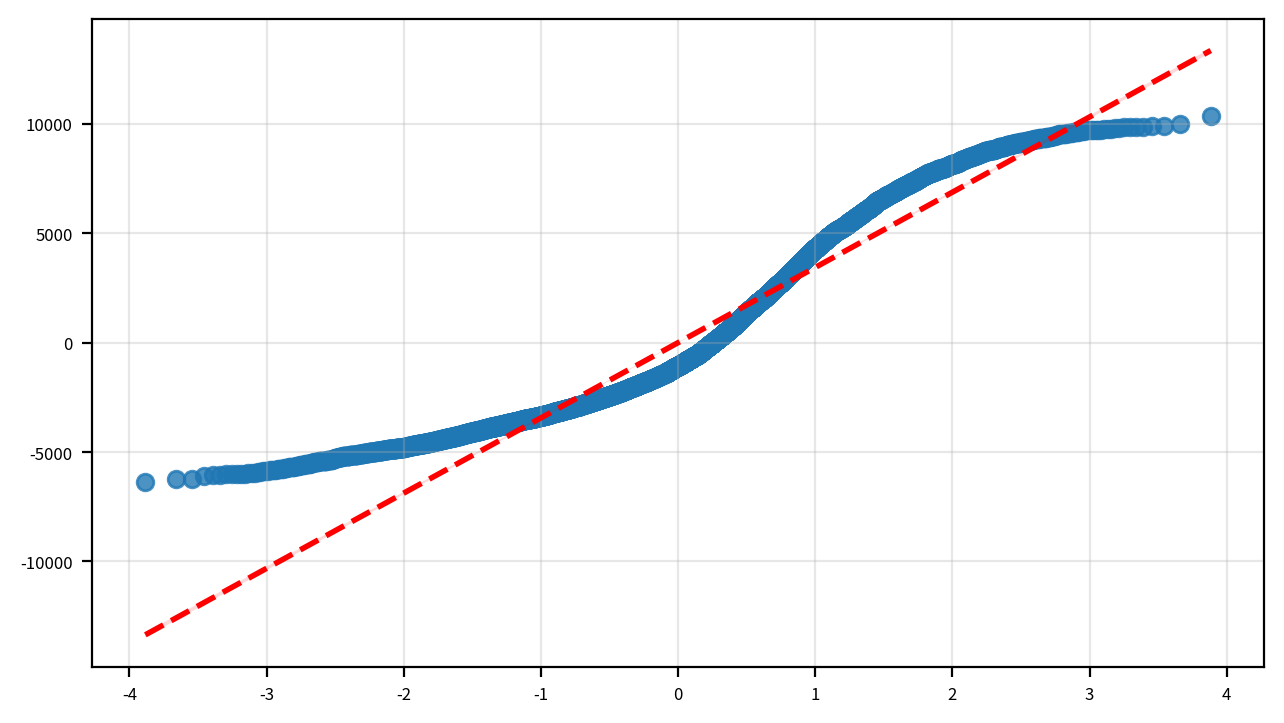

In [37]:
(x, y), _ = probplot(fit.resid)

width_px  = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.regplot(x=x, y=y, line_kws={
    "color": "red",
    "linestyle": "--",   
    "linewidth": 2
            })

ax.grid(True, alpha=0.3)   

plt.tight_layout()      
plt.show()              
plt.close()             
